In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob,os
import matplotlib.dates as mdates

In [377]:
Bfina = pd.read_csv(r'C:\Users\YASHA\bfinaVSbfins/BAJFINANCE.csv')
Bfins = pd.read_csv(r'C:\Users\YASHA\bfinaVSbfins/BAJAJFINSV.csv')

### Baja Finance table

In [378]:
Bfina.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-03-31,6.37357,6.99053,6.19869,6.78650,2.843474,225169.0
1,2009-04-01,6.65533,7.37430,6.65533,7.01482,2.939138,64853.0
2,2009-04-02,7.02453,7.57833,7.01967,7.44717,3.120288,251219.0
3,2009-04-06,7.43260,7.57833,7.38402,7.41802,3.108075,43723.0
4,2009-04-08,6.95652,8.05441,6.95652,7.92325,3.319761,90234.0


In [379]:
Bfina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 7 columns):
Date         2472 non-null object
Open         2465 non-null float64
High         2465 non-null float64
Low          2465 non-null float64
Close        2465 non-null float64
Adj Close    2465 non-null float64
Volume       2465 non-null float64
dtypes: float64(6), object(1)
memory usage: 135.3+ KB


### Baja Finserv table

In [380]:
Bfins.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-03-31,162.940994,168.001007,158.177002,166.085007,163.282547,13950.0
1,2009-04-01,165.054001,178.807999,162.598007,175.910004,172.941757,13795.0
2,2009-04-02,181.755997,184.703003,169.278000,175.320999,172.362686,18136.0
3,2009-04-06,176.106995,186.520996,176.106995,184.604996,181.490051,23347.0
4,2009-04-08,172.716995,191.580002,172.716995,187.945007,184.773697,32274.0


In [381]:
Bfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 7 columns):
Date         2472 non-null object
Open         2462 non-null float64
High         2462 non-null float64
Low          2462 non-null float64
Close        2462 non-null float64
Adj Close    2462 non-null float64
Volume       2462 non-null float64
dtypes: float64(6), object(1)
memory usage: 135.3+ KB


### Graphically it shows Bajaj Finance and Bajaj Finserv are following same pattern
####  Overall trend

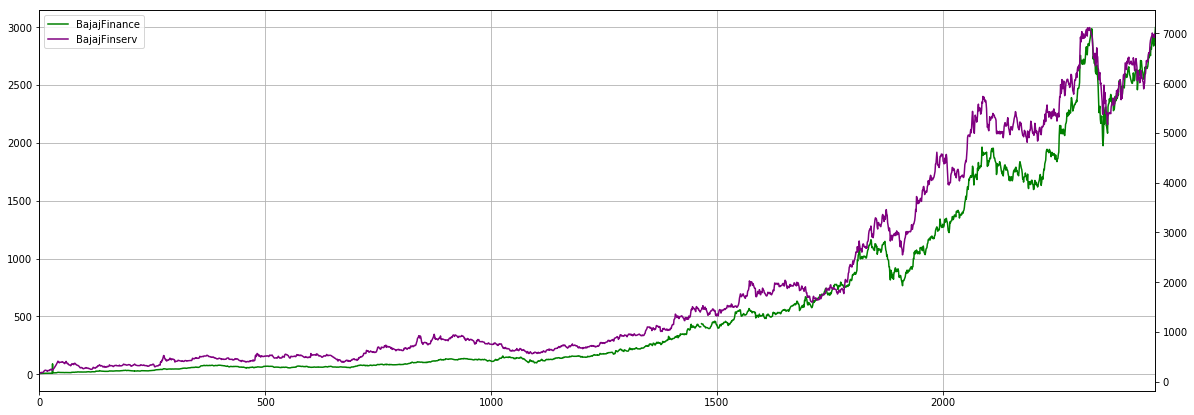

In [382]:
plt.figure(figsize=(20,7))
ax1 = Bfina['Close'].plot(color='green',grid=True, label='BajajFinance')
ax2 = Bfins['Close'].plot(color='purple',grid=True, secondary_y = True, label = 'BajajFinserv')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc = 2)
plt.show()

#### Recent  trends of 3 years

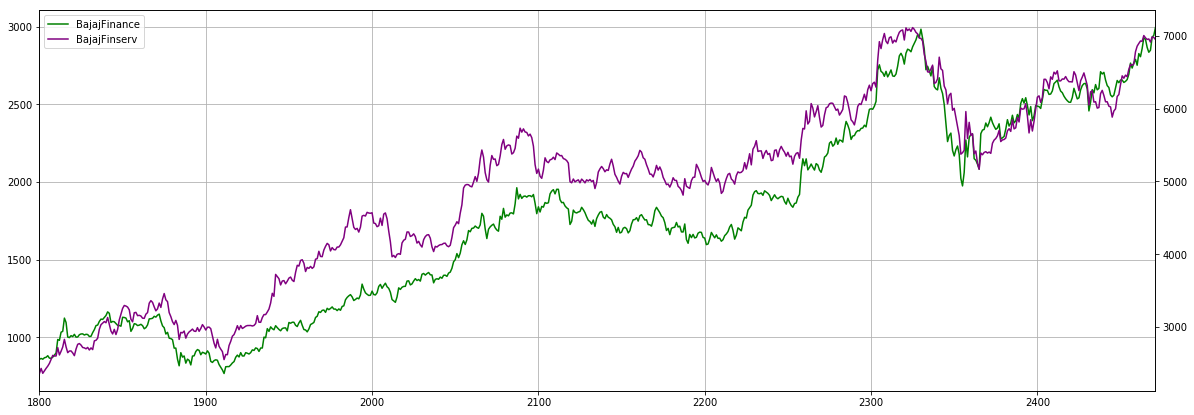

In [383]:
plt.figure(figsize=(20,7))
ax1 = Bfina['Close'][1800:].plot(color='green',grid=True, label='BajajFinance')
ax2 = Bfins['Close'][1800:].plot(color='purple',grid=True, secondary_y = True, label = 'BajajFinserv')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc = 2)
plt.show()

### Made one DataFrame of both the stocks with there closings

In [357]:
path = "bfinaVSbfins/"
allFiles = glob.glob(os.path.join(path, "*.csv"))
np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header= 0)
    # get symbol name file
    df['Symbol'] = (file_.split('\\')[1]).split(".")[0]
#     print(df)
#     # pull only needed fields 
    df =df[['Symbol','Date','Adj Close']]
    np_array_list.append(df.as_matrix())
    
# # stack all arrays and transfer it into a data frame
comb_np_array = np.vstack(np_array_list)
# simplify column names
stock_data_raw = pd.DataFrame(comb_np_array, columns = ['Symbol','Date','Close'])
#fix datetime data
stock_data_raw['Date'] = pd.to_datetime(stock_data_raw['Date'], infer_datetime_format = True)
stock_data_raw['Date'] = stock_data_raw['Date'].dt.date

# check for NAs
stock_data_raw = stock_data_raw.pivot('Date','Symbol')
stock_data_raw.columns= stock_data_raw.columns.droplevel()

# collect correct header names (actual stocks)
column_names = list(stock_data_raw)
    
stock_data_raw.tail()

C:\Users\YASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Symbol,BAJAJFINSV,BAJFINANCE
Date,,
2019-03-22,6957.78,2831.69
2019-03-25,6914.99,2844.81
2019-03-26,6985.57,2929.22
2019-03-27,6978.07,2940.1
2019-03-28,6950.28,2990.61


In [358]:
#  repalce NaNs with previous value
stock_data_raw.fillna(method = 'bfill', inplace = True)
stock_data_raw.tail()

Symbol,BAJAJFINSV,BAJFINANCE
Date,,
2019-03-22,6957.777832,2831.686523
2019-03-25,6914.991699,2844.813721
2019-03-26,6985.568848,2929.215820
2019-03-27,6978.071289,2940.096436
2019-03-28,6950.280273,2990.608154


In [359]:
# past trend 

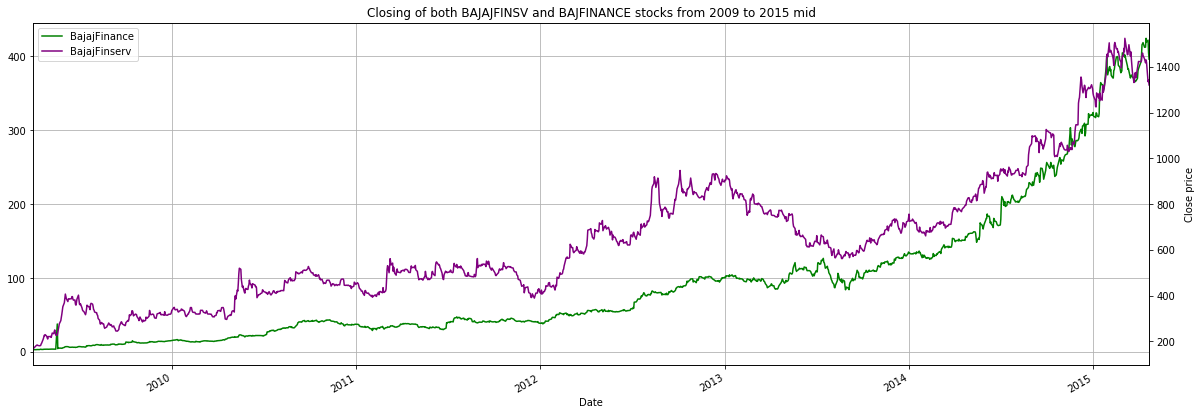

In [360]:
plt.figure(figsize=(20,7))
ax1 = stock_data_raw['BAJFINANCE'][:1500].plot(color='green',grid=True, label='BajajFinance')
ax2 = stock_data_raw['BAJAJFINSV'][:1500].plot(color='purple',grid=True, secondary_y = True, label = 'BajajFinserv')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.title('Closing of both BAJAJFINSV and BAJFINANCE stocks from 2009 to 2015 mid')
plt.ylabel('Close price')
plt.legend(h1+h2, l1+l2, loc = 2)
plt.show()

In [361]:
# Present trend

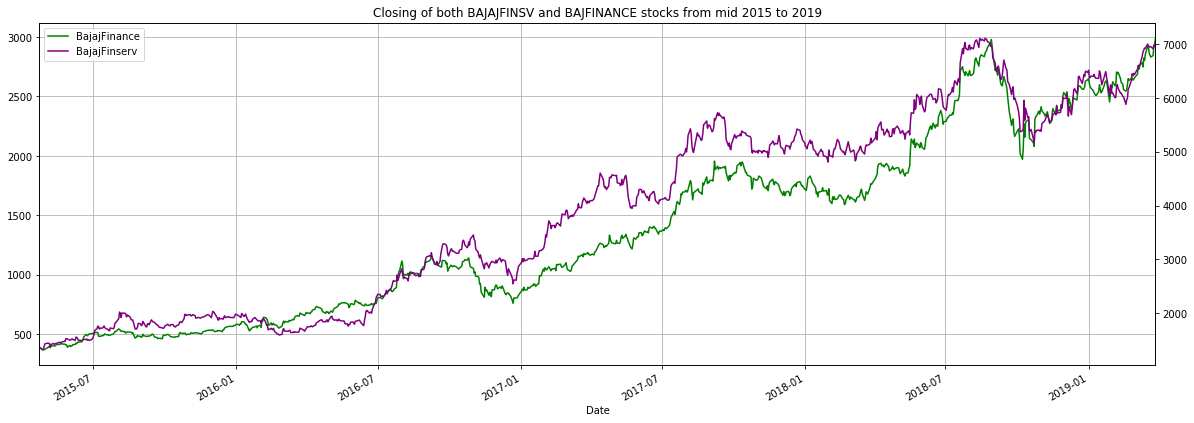

In [362]:
plt.figure(figsize=(20,7))
ax1 = stock_data_raw['BAJFINANCE'][1500:].plot(color='green',grid=True, label='BajajFinance')
ax2 = stock_data_raw['BAJAJFINSV'][1500:].plot(color='purple',grid=True, secondary_y = True, label = 'BajajFinserv')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.title('Closing of both BAJAJFINSV and BAJFINANCE stocks from mid 2015 to 2019')

plt.legend(h1+h2, l1+l2, loc = 2)
plt.show()

### In order to compare between differently priced assets we need to normalizing the data 
### Percentage change a simple way to transform price data into percentage change applying rolling sum known as cumulative sum.

In [363]:
def normalize_and_accumulate_series(data):
    # take tail to drop head NA
    return data.pct_change().cumsum()

stock_data_raw['BAJFINANCE'] = normalize_and_accumulate_series(stock_data_raw['BAJFINANCE'])
stock_data_raw['BAJAJFINSV'] = normalize_and_accumulate_series(stock_data_raw['BAJAJFINSV'])
# remove first row with NAs
stock_data_raw = stock_data_raw.tail(len(stock_data_raw)-1)
stock_data_raw.head()


Symbol,BAJAJFINSV,BAJFINANCE
Date,,
2009-04-01,0.059156,0.033643
2009-04-02,0.055808,0.095277
2009-04-06,0.108762,0.091363
2009-04-08,0.126855,0.159471
2009-04-09,0.115879,0.140464


## After Normalization

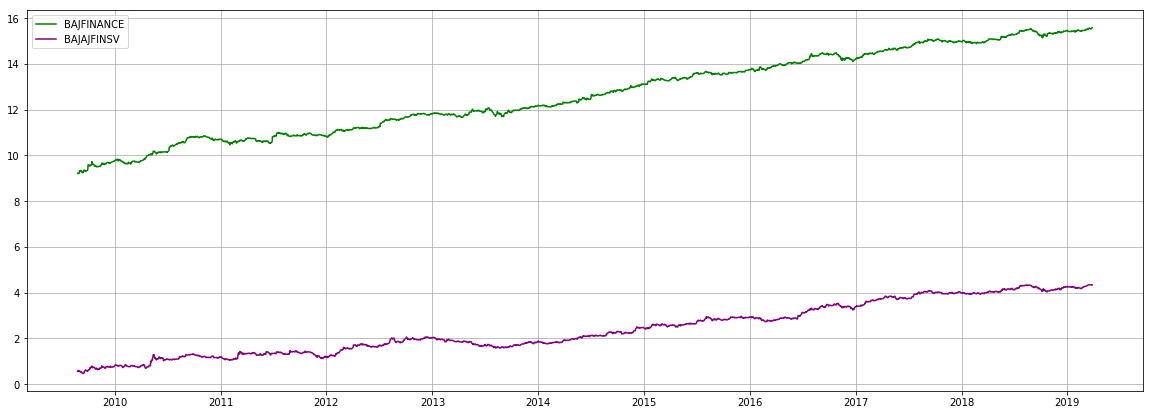

In [364]:
fig, ax = plt.subplots(figsize=(20,7))
plt.plot(stock_data_raw['BAJFINANCE'][100:], color = 'green', label='BAJFINANCE')
plt.plot(stock_data_raw['BAJAJFINSV'][100:], color = 'purple', label = 'BAJAJFINSV')
ax.grid(True)
plt.legend(loc=2)
plt.show() 

In [365]:
from statsmodels.tsa.stattools import coint

def corr(data1,data2):
    "data1 & data2 should be numpy array"
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-(mean1*mean2))/(std1*std2)
    return corr

## This are highly correlated showing 0.9855% corrleation after 2010

In [367]:
stock_name_1 = 'BAJFINANCE'
stock_name_2 = 'BAJAJFINSV'


correlation = corr(stock_data_raw[stock_name_1][100:],stock_data_raw[stock_name_2][100:])


print('Correlation between %s and %s is %f' % (stock_name_1,stock_name_2,correlation))


Correlation between BAJFINANCE and BAJAJFINSV is 0.985559


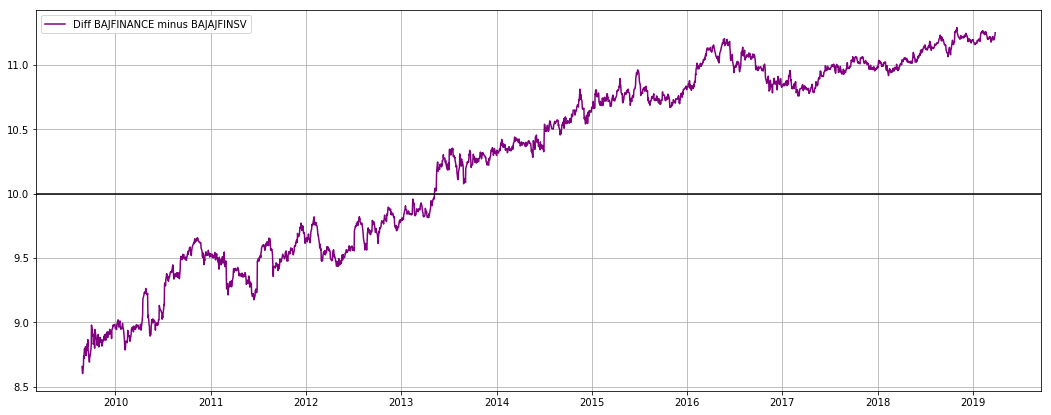

In [370]:
fig, ax = plt.subplots(figsize=(18,7))
plt.plot(stock_data_raw['BAJFINANCE'][100:] - stock_data_raw['BAJAJFINSV'][100:], color='purple', label='Diff BAJFINANCE minus BAJAJFINSV')
ax.grid(True)
ax.axhline(y=10, color = 'black', linestyle='-')
plt.legend(loc=2)
plt.show()

In [371]:
def normalize_series(data):
    # take tail to drop head NA
    return data.pct_change()

stock_data_raw['BAJFINANCE'][100:] = normalize_series(stock_data_raw['BAJFINANCE'][100:])
stock_data_raw['BAJAJFINSV'][100:] = normalize_series(stock_data_raw['BAJAJFINSV'][100:])

# remove first row with NAs
stock_data_raw = stock_data_raw.tail(len(stock_data_raw)-1)


In [372]:
stock_data_raw.tail() 

Symbol,BAJAJFINSV,BAJFINANCE
Date,,
2019-03-22,0.000217,-0.000717
2019-03-25,-0.001417,0.000298
2019-03-26,0.002355,0.001909
2019-03-27,-0.000247,0.000239
2019-03-28,-0.000917,0.001103


## Complete trend of the stocks
### Red line indicates the point of entry and exit
### Black line indiates the zero line from which we are calculating our change percentage

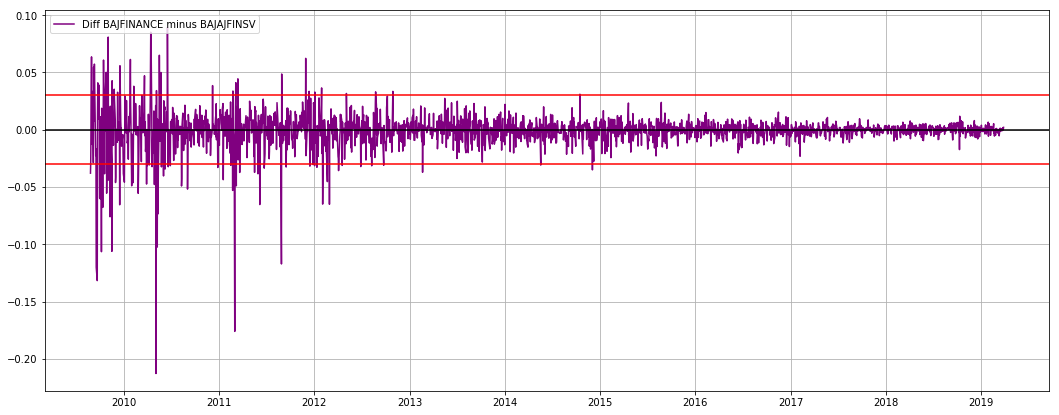

In [373]:
fig, ax = plt.subplots(figsize=(18,7))
plt.plot(stock_data_raw['BAJFINANCE'][100:] - stock_data_raw['BAJAJFINSV'][100:], color='purple', label='Diff BAJFINANCE minus BAJAJFINSV')
ax.grid(True)
ax.axhline(y=0, color = 'black', linestyle='-')
ax.axhline(y=0.03, color = 'red', linestyle='-')
ax.axhline(y=-0.03, color = 'red', linestyle='-')
plt.legend(loc=2)
plt.show()

## For  2012 to 2016, It shows that 0.015% change were the point hit for the entry and exit to the stocks 

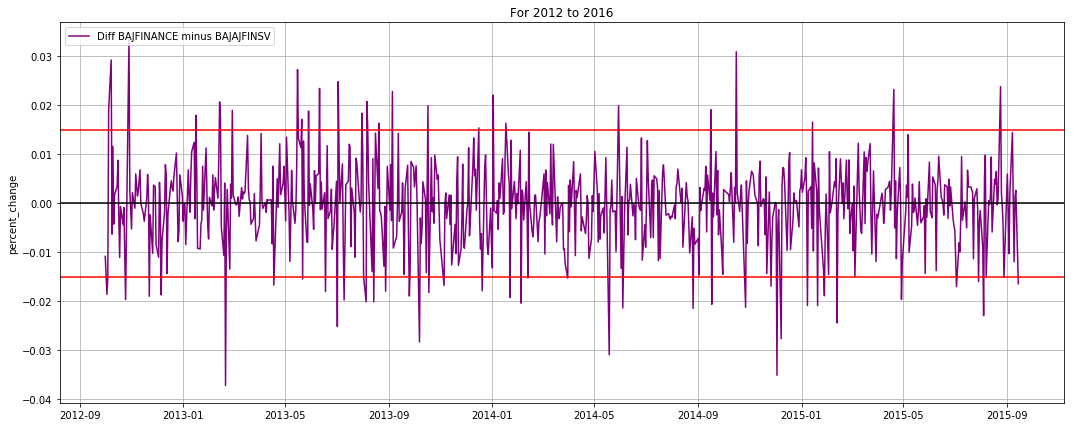

In [374]:
fig, ax = plt.subplots(figsize=(18,7))
plt.plot(stock_data_raw['BAJFINANCE'][870:1600] - stock_data_raw['BAJAJFINSV'][870:1600], color='purple', label='Diff BAJFINANCE minus BAJAJFINSV')
ax.grid(True)
ax.axhline(y=0, color = 'black', linestyle='-')
ax.axhline(y=0.015, color = 'red', linestyle='-')
ax.axhline(y=-0.015, color = 'red', linestyle='-')
plt.ylabel('percent_change')
plt.legend(loc=2)
plt.title('For 2012 to 2016')
plt.show()

In [ ]:
## From  2016 to 2019, 
## It shows that 0.007% change were the point hit for the entry and exit to the stocks..

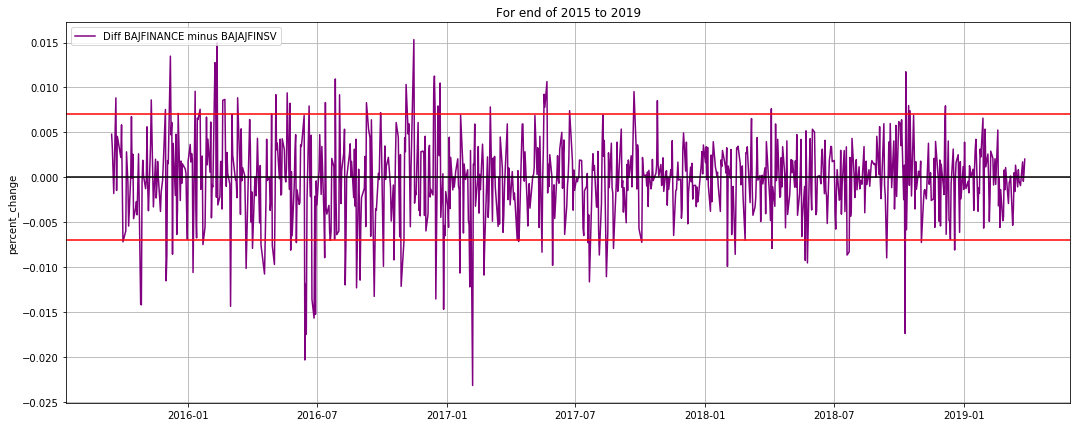

In [375]:
fig, ax = plt.subplots(figsize=(18,7))
plt.plot(stock_data_raw['BAJFINANCE'][1600:] - stock_data_raw['BAJAJFINSV'][1600:], color='purple', label='Diff BAJFINANCE minus BAJAJFINSV')
ax.grid(True)
ax.axhline(y=0, color = 'black', linestyle='-')
ax.axhline(y=0.007, color = 'red', linestyle='-')
ax.axhline(y=-0.007, color = 'red', linestyle='-')
plt.legend(loc=2)
plt.title('For end of 2015 to 2019')
plt.ylabel('percent_change')
plt.show()

## Analysis  : 
#### From the data it is clearly seen that the it is time to take postion into the stock, 
#### Short position in Bajaj Finance 
#### Long Position in Bajaj Finserv
####  It is repeating the old pattern that has been shown its effect twice till now in the tenurre of 10 years and it is nearly creating the same pattern again which is will give returns within 2 to 3 months.
#### And whenever the price is fluctuating by 0.007% from mean diffrence then it is the point to take position, if it shows positive  percentage change then short Bajaj Finance and long Bajaj Finserv and negative change then short Bajaj Finserv and long Bajaj finance for short interval
